In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import seaborn as sns

In [2]:
#Speicherort für Grafiken definieren
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#Daten importieren
calls = pd.read_excel(r'masterlist_total.xlsx')
calls = calls.drop([calls.columns[0]], axis='columns')

<h1> Beschreibung der Stichprobe </h2>

<h3>Stichprobengröße</h3>

In [4]:
print('No of all calls: ' + str(calls.shape[0]))  
print('No of A calls: ' + str(calls[calls.Terminal =='A'].shape[0]))  
print('No of B calls: ' + str(calls[calls.Terminal =='B'].shape[0]))  
print('No of C calls: ' + str(calls[calls.Terminal =='C'].shape[0]))  

No of all calls: 5707
No of A calls: 2553
No of B calls: 2367
No of C calls: 787


Insgesamt befinden sich 5713 Anläufe im Datensatz. Davon wurden 2554 am Terminal "A", 2370 am Terminal "B" und 789 am Terminal "C" durchgeführt. Die vergleichsweise geringe Anzahl an Anläufen am C wird dadurch verursacht, dass für viele Anläufe keine Löschinformationen im Datensatz gespeichert sind und diese daher in der weiteren Analyse nicht berücksichtigt werden können.

<h3>Schiffskapazitäten</h3>

In [5]:
capacity_statistics_all = calls['TEU'].describe()
capacity_statistics_all

count     5707.000000
mean      3013.537060
std       4382.309453
min        387.000000
25%        868.000000
50%       1085.000000
75%       2487.000000
max      20988.000000
Name: TEU, dtype: float64

In [6]:
capacity_statistics = calls.groupby(['Vessel_Class'])
capacity_statistics = capacity_statistics['TEU'].describe()
capacity_statistics = capacity_statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}"})
capacity_statistics

,count,mean,std,min,25%,50%,75%,max
Vessel_Class,,,,,,,,
Large,406,7926,1694.557369,5014,6456.000000,8386.000000,9375.000000,10114
Medium,906,2912,1188.158187,1574,1638.000000,2487.000000,4255.000000,4922
Small,3932,1008,261.522203,387,868.000000,1025.000000,1118.000000,1440
UltraLarge,140,19872,627.821187,18800,19150.000000,20150.000000,20150.000000,20988
VeryLarge,323,14234,1509.292903,11037,13806.000000,14026.000000,14993.000000,17859


In [7]:
capacity_statistics = calls.groupby(['Terminal'])
capacity_statistics = capacity_statistics['TEU'].describe()
capacity_statistics = capacity_statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}"})
capacity_statistics

,count,mean,std,min,25%,50%,75%,max
Terminal,,,,,,,,
A,2553,2981,3419.037998,387,868.000000,1221.000000,4402.000000,14100
B,2367,3167,5166.448233,387,868.000000,1036.000000,1578.000000,20600
C,787,2658,4573.119384,390,907.000000,1085.000000,1578.000000,20988


Saving figure Verteilung_Schiffslängen


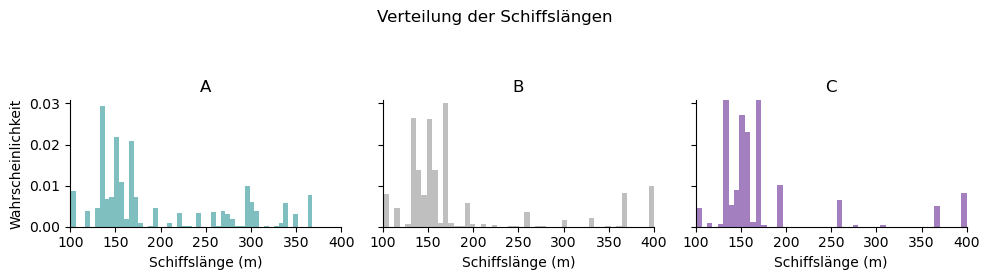

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['#008080', '#808080', '#4B0082']

for i, (ax, Terminal) in enumerate(zip(axes.flatten(), calls.Terminal.unique())):
    x = calls.loc[calls.Terminal==Terminal, 'Länge']
    ax.hist(x, alpha=0.5, bins=50, density=True, stacked=True, label=str(Terminal), color=colors[i])
    ax.set_title(Terminal)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.set_xlim(100, 400); ax.set_ylim();
    
for ax in axes.flat:
    ax.set(xlabel='Schiffslänge (m)', ylabel='Wahrscheinlichkeit')
for ax in axes.flat:
    ax.label_outer()

plt.suptitle('Verteilung der Schiffslängen', y=1.10, size=12)
plt.tight_layout()
save_fig("Verteilung_Schiffslängen")

<h3>Schiffslängen</h3>

In [9]:
length_statistics_all = calls['Länge'].describe()
length_statistics_all

count    5707.000000
mean      187.185562
std        77.028089
min       100.570000
25%       138.100000
50%       155.600000
75%       194.990000
max       400.000000
Name: Länge, dtype: float64

In [10]:
length_statistics = calls.groupby(['Vessel_Class'])
length_statistics = length_statistics['Länge'].describe()
length_statistics = length_statistics.style.format({"count": "{:.0f}","max": "{:.0f}","mean": "{:.0f}"})
length_statistics

,count,mean,std,min,25%,50%,75%,max
Vessel_Class,,,,,,,,
Large,406,309,24.307454,270.000000,294.130000,300.000000,336.000000,350
Medium,906,217,44.621687,168.000000,169.000000,194.990000,259.800000,294
Small,3932,145,17.635389,100.570000,134.440000,149.140000,157.650000,170
UltraLarge,140,400,0.059378,399.800000,399.990000,400.000000,400.000000,400
VeryLarge,323,367,15.531195,328.460000,365.900000,368.000000,368.520000,399


In [11]:
length_statistics = calls.groupby(['Terminal'])
length_statistics = length_statistics['Länge'].describe()
length_statistics = length_statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}"})
length_statistics

,count,mean,std,min,25%,50%,75%,max
Terminal,,,,,,,,
A,2553,195,75.854481,101,138.100000,159.930000,259.800000,368
B,2367,182,80.082763,101,137.500000,151.720000,170.150000,400
C,787,177,68.698686,101,141.700000,155.600000,168.110000,400


Saving figure Verteilung_Schiffskapazitäten


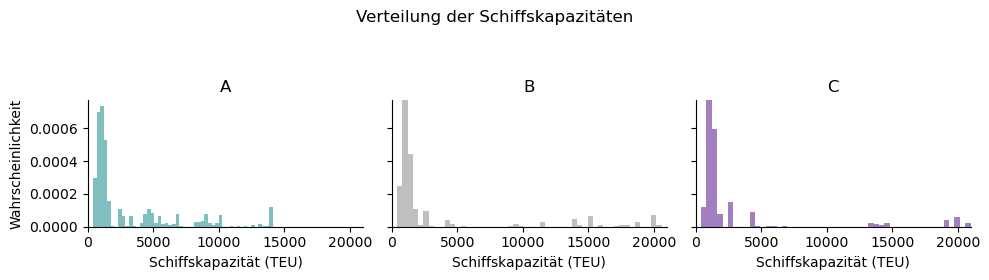

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['#008080', '#808080', '#4B0082']

for i, (ax, Terminal) in enumerate(zip(axes.flatten(), calls.Terminal.unique())):
    x = calls.loc[calls.Terminal==Terminal, 'TEU']
    ax.hist(x, alpha=0.5, bins=50, density=True, stacked=True, label=str(Terminal), color=colors[i])
    ax.set_title(Terminal)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.set_xlim(0, 21000); ax.set_ylim();

for ax in axes.flat:
    ax.set(xlabel='Schiffskapazität (TEU)', ylabel='Wahrscheinlichkeit')
for ax in axes.flat:
    ax.label_outer()
    
plt.suptitle('Verteilung der Schiffskapazitäten', y=1.10, size=12)
plt.tight_layout();
save_fig("Verteilung_Schiffskapazitäten")

<h3>Zusammenfassung</h3>

Es kann beobachtet werden, dass sich die analysierten Terminals hinsichtlich in der Verteilung der Schiffsgrößen unterscheiden. Als Parameter für die Schiffsgrößen können sowohl die Kapazität sowie die Länge des Fahrzeugs herangezogen werden. 

Hinsichtlich der durchschnittlichen Kapazität können für das Terminal "C" die niedrigsten Werte mit durchschnittlich 2685 TEU beobachtet werden, gefolgt von 2980 TEU am Terminal "A" sowie 3164 TEU am Terminal "C". Die durchschnittliche Kapazität aller Terminals liegt bei 3011 TEU. Hinsichtlich der Schiffslängen weisen die Beobachtungen für das Terminal "C" einen Mittelwert von 177m, für das Terminal "B" 182m und für das Terminal "A" 195m auf. Die durchschnittliche Schiffslänge aller Terminals liegt bei 187m.

Die Verteilung beider Größenparameter ist bei allen Terminals stark asymmetrisch rechtsschief. Der Median (50%-Perzentil) liegt sowohl bei der Kapazität als auch bei der Länge unterhalb des arithmetischen Mittels. Für das Terminal "A" fällt auf, dass der Anteil größerer Schiffe vergleichsweise höher ausfällt. So liegen mehr als 25% aller Beobachtungen oberhalb des Mittelwerts.

Erwähnenswert ist, dass die größte beobachtete Schiffskapazität am Terminal "A" mit 14100 TEU deutlich unterhalb der Maximalwerte des Terminal "B" (20600 TEU) sowie des "C" (20988 TEU) lag. Diese Beobachtung durch nautischen Zugangsbeschränkungen für dieses Terminal zu erklären. 

## Analyse von Prozesszeiten

<h3>Dauer bis Abschluss des Entladeprozesses (ATA -> End Unloading) </h3>

In [13]:
statistics = calls['UNLOADING_TOTAL'].describe()
statistics

count    5707.000000
mean      691.714561
std       740.409127
min         1.000000
25%       225.000000
50%       420.000000
75%       865.000000
max      9880.000000
Name: UNLOADING_TOTAL, dtype: float64

In [14]:
statistics = calls.groupby(['Vessel_Class'])['UNLOADING_TOTAL'].describe()
statistics = statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}","median": "{:.0f}","std": "{:.2f}"})
statistics

,count,mean,std,min,25%,50%,75%,max
Vessel_Class,,,,,,,,
Large,406,1334,576.65,16,977.000000,1295.000000,1593.750000,5220
Medium,906,734,521.80,1,350.000000,675.000000,1023.750000,6702
Small,3932,406,338.95,1,180.000000,315.000000,535.000000,3640
UltraLarge,140,3034,994.07,1240,2435.000000,2865.000000,3322.500000,9880
VeryLarge,323,2234,637.91,61,1853.500000,2180.000000,2552.500000,4620


In [15]:
statistics = calls.groupby(['Terminal'])['UNLOADING_TOTAL'].describe()
statistics = statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}","median": "{:.0f}","std": "{:.2f}"})
statistics

,count,mean,std,min,25%,50%,75%,max
Terminal,,,,,,,,
A,2553,644,622.96,1,200.000000,395.000000,915.000000,5220
B,2367,813,852.36,1,310.000000,510.000000,922.500000,9880
C,787,482,660.86,1,140.000000,255.000000,460.000000,3755


Saving figure Verteilung_Unloading_total


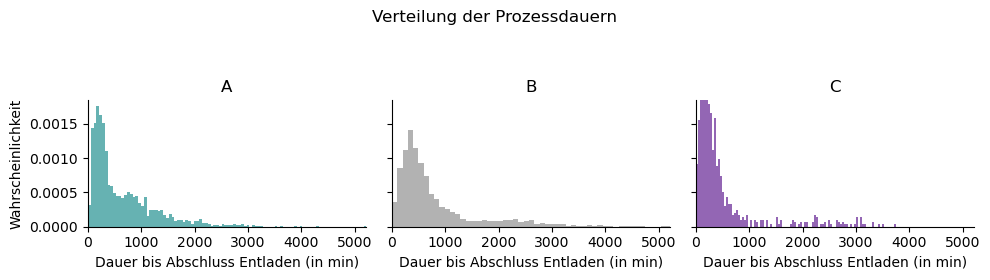

In [16]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.999

#Erstelle Plot

fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['#008080', '#808080', '#4B0082']

for i, (ax, Terminal) in enumerate(zip(axes.flatten(), calls.Terminal.unique())):
    x = calls.loc[calls.Terminal==Terminal, 'UNLOADING_TOTAL']
    ax.hist(x, alpha=0.6, bins=100, density=True, stacked=True, label=str(Terminal), color=colors[i])
    ax.set_title(Terminal)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.set_xlim(0, calls['UNLOADING_TOTAL'].quantile(threshold)); ax.set_ylim();

for ax in axes.flat:
    ax.set(xlabel='Dauer bis Abschluss Entladen (in min)', ylabel='Wahrscheinlichkeit')
for ax in axes.flat:
    ax.label_outer()
    
plt.suptitle('Verteilung der Prozessdauern', y=1.10, size=12)
plt.tight_layout()
save_fig("Verteilung_Unloading_total")

<h3>Dauer der Rüstzeiten (ATA --> Start Entladen)</h3>

In [17]:
statistics = calls['SETUP_mt'].describe()
statistics

count    5707.000000
mean      112.477484
std       210.710902
min         0.000000
25%        15.000000
50%        45.000000
75%       125.000000
max      2885.000000
Name: SETUP_mt, dtype: float64

In [18]:
statistics = calls.groupby(['Terminal'])['SETUP_mt'].describe()
statistics = statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}","median": "{:.0f}","std": "{:.2f}"})
statistics

,count,mean,std,min,25%,50%,75%,max
Terminal,,,,,,,,
A,2553,72,174.13,0,10.000000,25.000000,70.000000,2570
B,2367,156,245.59,0,28.000000,75.000000,190.000000,2885
C,787,114,176.71,0,27.000000,60.000000,129.000000,1740


In [19]:
statistics = calls.groupby(['Vessel_Class'])['SETUP_mt'].describe()
statistics = statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}","median": "{:.0f}","std": "{:.2f}"})
statistics

,count,mean,std,min,25%,50%,75%,max
Vessel_Class,,,,,,,,
Large,406,83,213.58,0,20.000000,30.000000,65.000000,2520
Medium,906,120,240.69,0,20.000000,45.500000,130.000000,2885
Small,3932,114,206.00,0,15.000000,45.000000,130.250000,2845
UltraLarge,140,110,192.88,0,29.750000,63.000000,126.250000,1700
VeryLarge,323,110,176.59,0,28.500000,55.000000,121.000000,1820


Saving figure Verteilung_Rüstzeiten


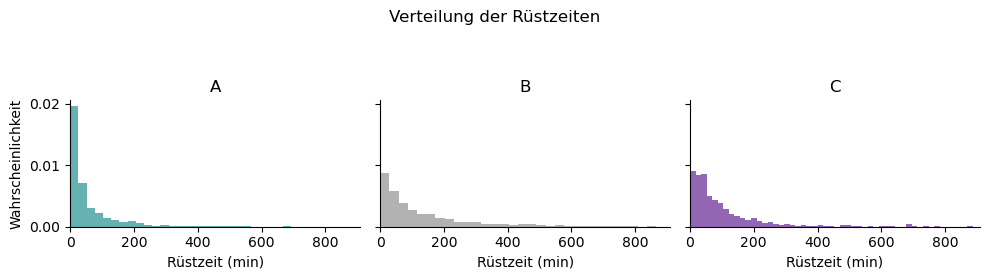

In [20]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.99

#Erstelle Plot

fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['#008080', '#808080', '#4B0082']

for i, (ax, Terminal) in enumerate(zip(axes.flatten(), calls.Terminal.unique())):
    x = calls.loc[calls.Terminal==Terminal, 'SETUP_mt']
    ax.hist(x, alpha=0.6, bins=100, density=True, stacked=True, label=str(Terminal), color=colors[i])
    ax.set_title(Terminal)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.set_xlim(0,  calls['SETUP_mt'].quantile(threshold)); ax.set_ylim();

for ax in axes.flat:
    ax.set(xlabel='Rüstzeit (min)', ylabel='Wahrscheinlichkeit')
for ax in axes.flat:
    ax.label_outer()
    
plt.suptitle('Verteilung der Rüstzeiten', y=1.10, size=12)
plt.tight_layout()
save_fig("Verteilung_Rüstzeiten")

<h3>Dauer des Entladeprozess</h3>

In [21]:
statistics = calls['UNLOADING_mt'].describe()
statistics

count    5707.000000
mean      579.237077
std       707.555558
min         1.000000
25%       150.000000
50%       310.000000
75%       720.000000
max      9825.000000
Name: UNLOADING_mt, dtype: float64

In [22]:
statistics = calls.groupby(['Terminal'])['UNLOADING_mt'].describe()
statistics = statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}","median": "{:.0f}","std": "{:.2f}"})
statistics

,count,mean,std,min,25%,50%,75%,max
Terminal,,,,,,,,
A,2553,572,595.74,1,150.000000,315.000000,824.000000,5185
B,2367,657,816.79,1,200.000000,360.000000,680.000000,9825
C,787,368,640.83,1,60.000000,152.000000,319.000000,3700


In [23]:
statistics = calls.groupby(['Vessel_Class'])['UNLOADING_mt'].describe()
statistics = statistics.style.format({"count": "{:.0f}","min": "{:.0f}","max": "{:.0f}","mean": "{:.0f}","median": "{:.0f}","std": "{:.2f}"})
statistics

,count,mean,std,min,25%,50%,75%,max
Vessel_Class,,,,,,,,
Large,406,1251,536.62,1,920.000000,1235.000000,1530.000000,5185
Medium,906,613,454.05,1,251.250000,565.000000,905.000000,5725
Small,3932,292,257.42,1,120.000000,225.000000,385.000000,3630
UltraLarge,140,2923,955.47,1217,2352.500000,2758.000000,3203.750000,9825
VeryLarge,323,2123,603.52,1,1777.500000,2115.000000,2440.000000,4260


Saving figure Verteilung_Endladedauer


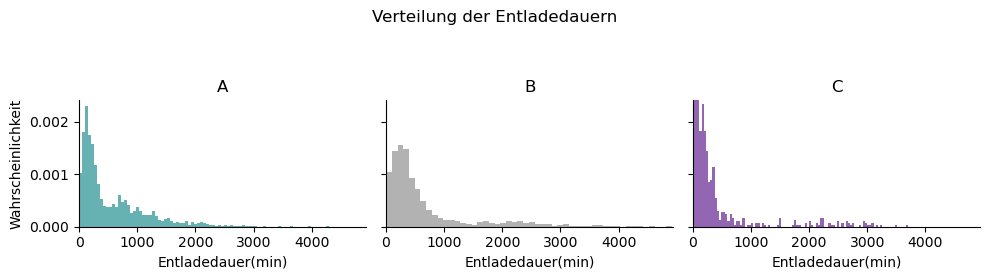

In [24]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.999

#Erstelle Plot

fig, axes = plt.subplots(1, 3, figsize=(10,2.5), dpi=100, sharex=True, sharey=True)
colors = ['#008080', '#808080', '#4B0082']

for i, (ax, Terminal) in enumerate(zip(axes.flatten(), calls.Terminal.unique())):
    x = calls.loc[calls.Terminal==Terminal, 'UNLOADING_mt']
    ax.hist(x, alpha=0.6, bins=100, density=True, stacked=True, label=str(Terminal), color=colors[i])
    ax.set_title(Terminal)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.set_xlim(0, calls['UNLOADING_mt'].quantile(threshold)); ax.set_ylim();

for ax in axes.flat:
    ax.set(xlabel='Entladedauer(min)', ylabel='Wahrscheinlichkeit')
for ax in axes.flat:
    ax.label_outer()
    
plt.suptitle('Verteilung der Entladedauern', y=1.10, size=12)
plt.tight_layout()
save_fig("Verteilung_Endladedauer")

## Entladeende bis Abfahrt

In [25]:
statistics = calls['UNLOAD_TO_DEP_mt'].describe()
statistics

count    5707.000000
mean      228.424041
std       246.766724
min         0.000000
25%        80.000000
50%       160.000000
75%       290.000000
max      3379.000000
Name: UNLOAD_TO_DEP_mt, dtype: float64

In [26]:
UNLOAD_TO_DEP_statistics = calls.groupby(['Vessel_Class'])
UNLOAD_TO_DEP_statistics = UNLOAD_TO_DEP_statistics['UNLOAD_TO_DEP_mt'].describe()
UNLOAD_TO_DEP_statistics = UNLOAD_TO_DEP_statistics.style.format({"count": "{:.0f}","max": "{:.0f}","mean": "{:.0f}"})
UNLOAD_TO_DEP_statistics

,count,mean,std,min,25%,50%,75%,max
Vessel_Class,,,,,,,,
Large,406,390,320.569968,15.000000,175.000000,302.500000,493.750000,2495
Medium,906,259,236.529961,5.000000,95.000000,191.000000,335.750000,1600
Small,3932,176,170.184968,0.000000,65.000000,130.000000,230.000000,1870
UltraLarge,140,541,490.530892,10.000000,180.000000,395.000000,757.500000,2730
VeryLarge,323,444,420.424387,15.000000,185.000000,305.000000,562.500000,3379


Saving figure Verteilung_Löschende bis Abfahrt


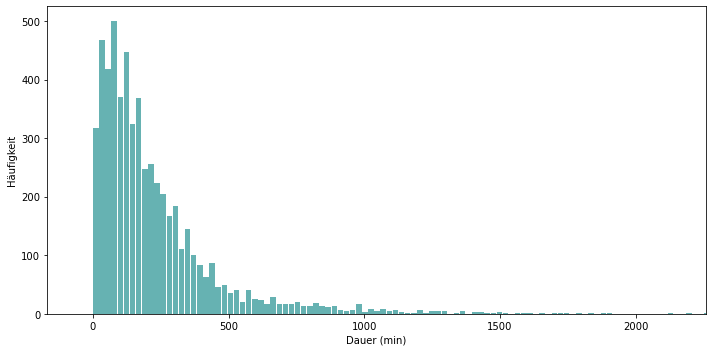

In [27]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.999

calls.hist(column='UNLOAD_TO_DEP_mt', bins=150, figsize=(10,5), alpha=0.6, color='#008080', grid=False, rwidth=0.9)
plt.title('')
plt.xlabel('Dauer (min)')
plt.ylabel('Häufigkeit')
plt.xlim(right=calls['UNLOAD_TO_DEP_mt'].quantile(threshold))
save_fig("Verteilung_Löschende bis Abfahrt")

## Analyse der Wetterverhältnisse

In [28]:
statistics = calls['AVG_WINDSPEED'].describe()
statistics

count    5704.000000
mean        4.510345
std         2.012548
min         0.133333
25%         3.023737
50%         4.271825
75%         5.735326
max        12.720000
Name: AVG_WINDSPEED, dtype: float64

array([[<AxesSubplot:title={'center':'AVG_WINDSPEED'}>]], dtype=object)

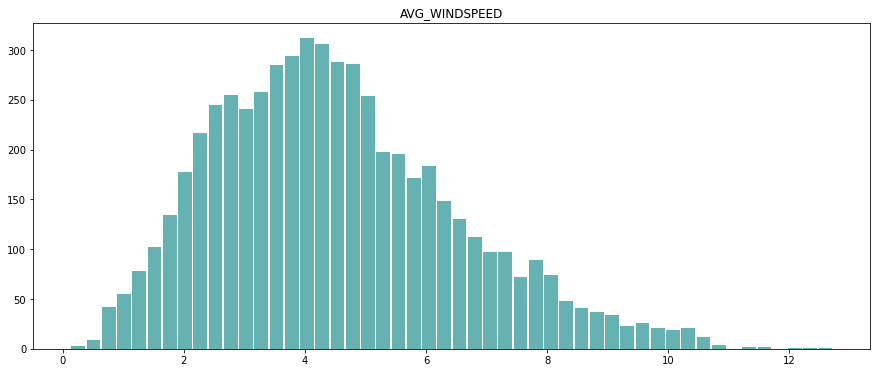

In [29]:
calls.hist(column='AVG_WINDSPEED',bins=50, alpha=0.6, grid=False, figsize=(15,6), color='#008080', rwidth=0.9)

In [30]:
statistics = calls['AVG_TEMPERATURE'].describe()
statistics

count    5704.000000
mean        7.656367
std         4.927081
min        -6.144444
25%         4.515110
50%         6.872381
75%        10.534375
max        30.100000
Name: AVG_TEMPERATURE, dtype: float64

array([[<AxesSubplot:title={'center':'AVG_TEMPERATURE'}>]], dtype=object)

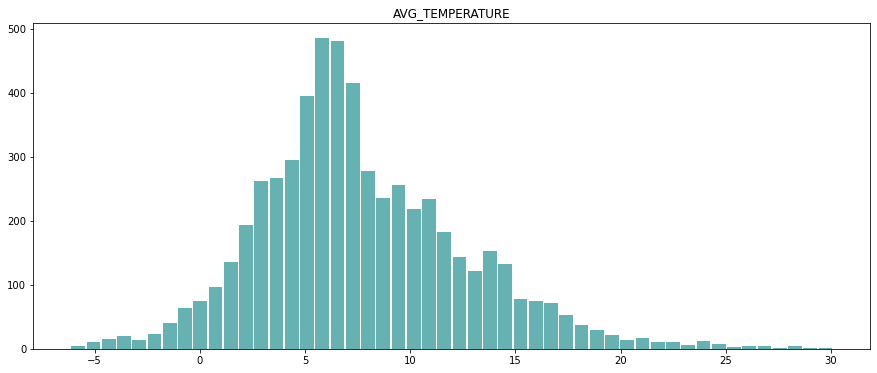

In [31]:
calls.hist(column='AVG_TEMPERATURE',bins=50, alpha=0.6, grid=False, figsize=(15,6), color='#008080', rwidth=0.9)

array([[<AxesSubplot:title={'center':'AVG_VISIBILITY'}>]], dtype=object)

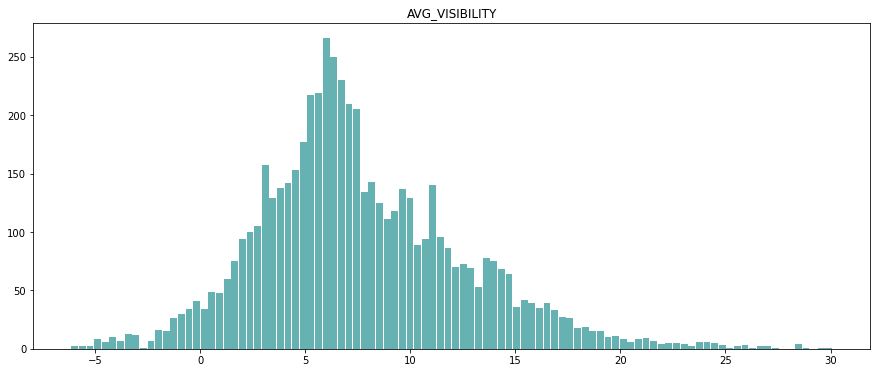

In [32]:
calls.hist(column='AVG_VISIBILITY',bins=100, alpha=0.6, grid=False, figsize=(15,6), color='#008080', rwidth=0.9)

 # Darstellung von Korrelationen

In [33]:
corr_matrix = calls.corr()
corr_matrix["UNLOADING_TOTAL"].sort_values(ascending=False)

UNLOADING_TOTAL     1.000000
UNLOADING_mt        0.958655
TEU                 0.818896
Breite              0.794047
Länge               0.787864
Tiefgang            0.646290
SETUP_mt            0.294752
UNLOAD_TO_DEP_mt    0.287796
AVG_VISIBILITY     -0.003184
AVG_TEMPERATURE    -0.003184
AVG_WINDSPEED      -0.004093
AVG_RAINFALL       -0.010072
Name: UNLOADING_TOTAL, dtype: float64

In [34]:
corr_matrix = calls.corr()
corr_matrix

,TEU,Länge,Breite,AVG_WINDSPEED,AVG_RAINFALL,AVG_TEMPERATURE,AVG_VISIBILITY,Tiefgang,UNLOADING_mt,SETUP_mt,UNLOADING_TOTAL,UNLOAD_TO_DEP_mt
TEU,1.000000,0.939117,0.958940,-0.015976,-0.015961,-0.000817,-0.000817,0.775543,0.862588,-0.019035,0.818896,0.379611
Länge,0.939117,1.000000,0.973776,-0.016166,-0.017139,0.002147,0.002147,0.858028,0.830885,-0.021618,0.787864,0.397692
Breite,0.958940,0.973776,1.000000,-0.014701,-0.012558,-0.000830,-0.000830,0.852333,0.835613,-0.015771,0.794047,0.395962
AVG_WINDSPEED,-0.015976,-0.016166,-0.014701,1.000000,0.024491,0.000925,0.000925,-0.021365,-0.005626,0.004513,-0.004093,0.010358
AVG_RAINFALL,-0.015961,-0.017139,-0.012558,0.024491,1.000000,0.056259,0.056259,-0.011381,-0.009301,-0.004160,-0.010072,-0.017529
AVG_TEMPERATURE,-0.000817,0.002147,-0.000830,0.000925,0.056259,1.000000,1.000000,-0.004120,-0.002990,-0.001148,-0.003184,-0.017552
AVG_VISIBILITY,-0.000817,0.002147,-0.000830,0.000925,0.056259,1.000000,1.000000,-0.004120,-0.002990,-0.001148,-0.003184,-0.017552
Tiefgang,0.775543,0.858028,0.852333,-0.021365,-0.011381,-0.004120,-0.004120,1.000000,0.684838,-0.028677,0.646290,0.348490
UNLOADING_mt,0.862588,0.830885,0.835613,-0.005626,-0.009301,-0.002990,-0.002990,0.684838,1.000000,0.010637,0.958655,0.287104
SETUP_mt,-0.019035,-0.021618,-0.015771,0.004513,-0.004160,-0.001148,-0.001148,-0.028677,0.010637,1.000000,0.294752,0.047197


In [35]:
corr_matrix = calls.corr()
corr_matrix["SETUP_mt"].sort_values(ascending=False)

SETUP_mt            1.000000
UNLOADING_TOTAL     0.294752
UNLOAD_TO_DEP_mt    0.047197
UNLOADING_mt        0.010637
AVG_WINDSPEED       0.004513
AVG_VISIBILITY     -0.001148
AVG_TEMPERATURE    -0.001148
AVG_RAINFALL       -0.004160
Breite             -0.015771
TEU                -0.019035
Länge              -0.021618
Tiefgang           -0.028677
Name: SETUP_mt, dtype: float64

<h3>Rüstzeiten</h3>

Saving figure Rüstzeiten_TEU


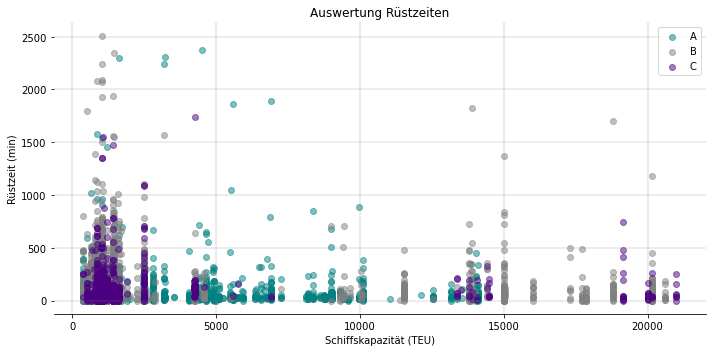

In [36]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.999

#Erstelle Plotdaten
plotdata = calls[calls.SETUP_mt < calls['SETUP_mt'].quantile(threshold)]

#Erstelle Plot
fig, ax = plt.subplots(figsize=(10, 5))

x = plotdata[plotdata.Terminal == 'A']['TEU']
y = plotdata[plotdata.Terminal == 'A']['SETUP_mt']

ax.scatter(x, y, c='#008080', label='A', alpha=0.5)

x = plotdata[plotdata.Terminal == 'B']['TEU']
y = plotdata[plotdata.Terminal == 'B']['SETUP_mt']

ax.scatter(x, y, c='#808080', label='B', alpha=0.5)

x = plotdata[plotdata.Terminal == 'C']['TEU']
y = plotdata[plotdata.Terminal == 'C']['SETUP_mt']

ax.scatter(x, y, c='#4B0082', label='C', alpha=0.5)

#Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Schiffskapazität (TEU)')
ax.set_ylabel('Rüstzeit (min)')
ax.grid(color='grey', linestyle='-', linewidth=0.3)

ax.set_title('Auswertung Rüstzeiten')
ax.legend()
save_fig("Rüstzeiten_TEU")
plt.show()

Saving figure Rüstzeiten_Länge


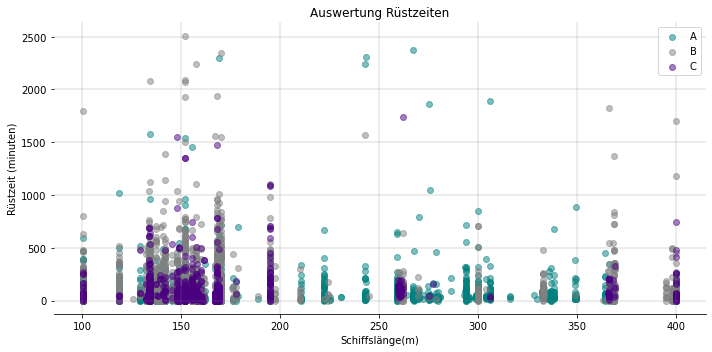

In [37]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.999

#Erstelle Plotdaten
plotdata = calls[calls.SETUP_mt < calls['SETUP_mt'].quantile(threshold)]

#Erstelle Plot
fig, ax = plt.subplots(figsize=(10, 5))

x = plotdata[plotdata.Terminal == 'A']['Länge']
y = plotdata[plotdata.Terminal == 'A']['SETUP_mt']

ax.scatter(x, y, c='#008080', label='A', alpha=0.5)

x = plotdata[plotdata.Terminal == 'B']['Länge']
y = plotdata[plotdata.Terminal == 'B']['SETUP_mt']

ax.scatter(x, y, c='#808080', label='B', alpha=0.5)

x = plotdata[plotdata.Terminal == 'C']['Länge']
y = plotdata[plotdata.Terminal == 'C']['SETUP_mt']

ax.scatter(x, y, c='#4B0082', label='C', alpha=0.5)

#Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Schiffslänge(m)')
ax.set_ylabel('Rüstzeit (minuten)')
ax.grid(color='grey', linestyle='-', linewidth=0.3)

ax.set_title('Auswertung Rüstzeiten')
ax.legend()

save_fig("Rüstzeiten_Länge")
plt.show()


Zwischen der Rüstdauer und der Schiffsgröße existiert kein linearer Zusammenhang.

<h3>Rüstzeiten</h3>

Saving figure Entladezeiten_TEU


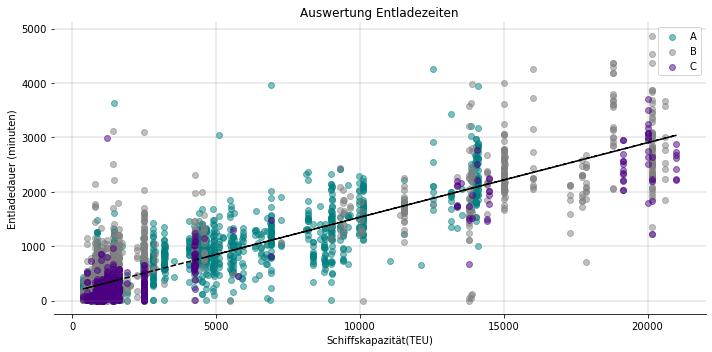

In [38]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.999

#Erstelle Plotdaten
plotdata = calls[calls.UNLOADING_mt < calls['UNLOADING_mt'].quantile(threshold)]

#Erstelle Plot

fig, ax = plt.subplots(figsize=(10, 5))

x = plotdata[plotdata.Terminal == 'A']['TEU']
y = plotdata[plotdata.Terminal == 'A']['UNLOADING_mt']

ax.scatter(x, y, c='#008080', label='A', alpha=0.5)

x = plotdata[plotdata.Terminal == 'B']['TEU']
y = plotdata[plotdata.Terminal == 'B']['UNLOADING_mt']

ax.scatter(x, y, c='#808080', label='B', alpha=0.5)

x = plotdata[plotdata.Terminal == 'C']['TEU']
y = plotdata[plotdata.Terminal == 'C']['UNLOADING_mt']

ax.scatter(x, y, c='#4B0082', label='C', alpha=0.5)

#Trendlinie
z = np.polyfit(plotdata.TEU, plotdata.UNLOADING_mt, 1)
p = np.poly1d(z)
b = calls.TEU
plt.plot(b,p(b),"r--", color="black",)


#Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Schiffskapazität(TEU)')
ax.set_ylabel('Entladedauer (minuten)')
ax.grid(color='grey', linestyle='-', linewidth=0.3)

ax.set_title('Auswertung Entladezeiten')
ax.legend()

save_fig("Entladezeiten_TEU")
plt.show()

Ein linearer Zusammenhang zwischen Löschdauer und Schiffskapazität ist erkennbar. Mit ansteigender Schiffslänge nimmt die Spannbreite der beobachteten Entladedauern zu. 

Saving figure Entladezeiten_Länge


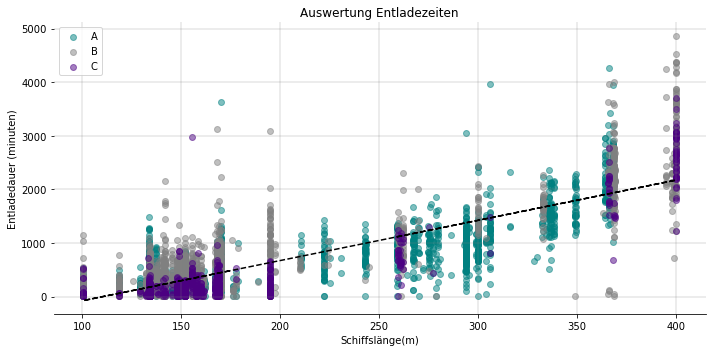

In [39]:
#Setze Schwelle für Anzeige (Ausreißer bereinigen)

threshold = 0.999

#Erstelle Plotdaten
plotdata = calls[calls.UNLOADING_mt < calls['UNLOADING_mt'].quantile(threshold)]

#Erstelle Plot

fig, ax = plt.subplots(figsize=(10, 5))

x = plotdata[plotdata.Terminal == 'A']['Länge']
y = plotdata[plotdata.Terminal == 'A']['UNLOADING_mt']

ax.scatter(x, y, c='#008080', label='A', alpha=0.5)

x = plotdata[plotdata.Terminal == 'B']['Länge']
y = plotdata[plotdata.Terminal == 'B']['UNLOADING_mt']

ax.scatter(x, y, c='#808080', label='B', alpha=0.5)

x = plotdata[plotdata.Terminal == 'C']['Länge']
y = plotdata[plotdata.Terminal == 'C']['UNLOADING_mt']

ax.scatter(x, y, c='#4B0082', label='C', alpha=0.5)

#Trendlinie
z = np.polyfit(plotdata.Länge, plotdata.UNLOADING_mt, 1)
p = np.poly1d(z)
b = plotdata.Länge
plt.plot(b,p(b),"r--", color="black",)


#Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('Schiffslänge(m)')
ax.set_ylabel('Entladedauer (minuten)')
ax.grid(color='grey', linestyle='-', linewidth=0.3)

ax.set_title('Auswertung Entladezeiten')
ax.legend()

save_fig("Entladezeiten_Länge")
plt.show()

Ein linearer Zusammenhang zwischen Löschdauer und Schiffslänge ist erkennbar. Mit ansteigender Schiffslänge nimmt die Spannbreite der beobachteten Entladedauern zu. 